In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the document first

df = pd.read_csv(r'car_fuel.csv')

df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`


In [2]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

df = df[cols]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [3]:
len(df)

9704

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 
There's one column with missing values. What is it?

<Axes: >

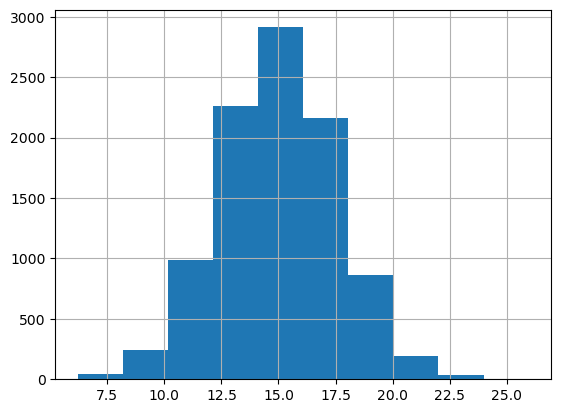

In [4]:
df['fuel_efficiency_mpg'].hist()

### Q1. There's one column with missing values. What is it?

In [5]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Q2. Records count

What's the median (50% percentile) for variable `'horsepower'`?

In [6]:
df['horsepower'].median()

149.0

### Q3. Fuel types

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [7]:
# Shuffle dataset and split into train/val/test sets

np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [8]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [9]:
# Define and intialize target variable 

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

# Delete target variable from dataset
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [10]:
# Check missing values in train set

df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [11]:
# Define linear regression method

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [12]:
# Define RMSE method

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Use the same code as in the lectures

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [13]:
cols2 = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [14]:
# Option 1: Filling with 0

def prepare_X_0(df):
    df_num = df[cols2]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train_0 = prepare_X_0(df_train)
w_0, w = train_linear_regression(X_train_0, y_train)

In [15]:
y_pred_0 = w_0 + X_train_0.dot(w)

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


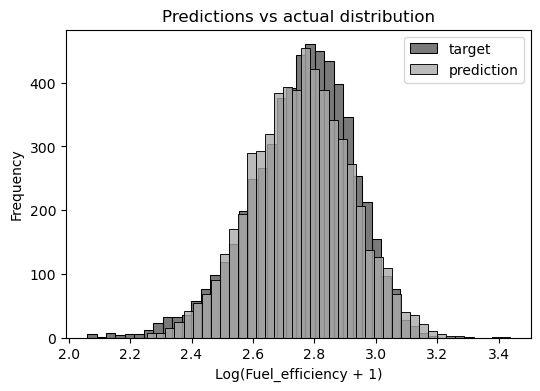

In [16]:
# Histogram plot of target and predictions for Option 1

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_0, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Fuel_efficiency + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [17]:
# Option 2: Filling with the mean

def prepare_X_mean(df):
    df_num = df[cols2].copy()
    mean_horsepower = df_num['horsepower'].mean()
    df_num['horsepower'] = df_num['horsepower'].fillna(mean_horsepower)
    X = df_num.values
    return X

X_train_mean = prepare_X_mean(df_train)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)




In [18]:
y_pred_mean = w_0_mean + X_train_mean.dot(w_mean)

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


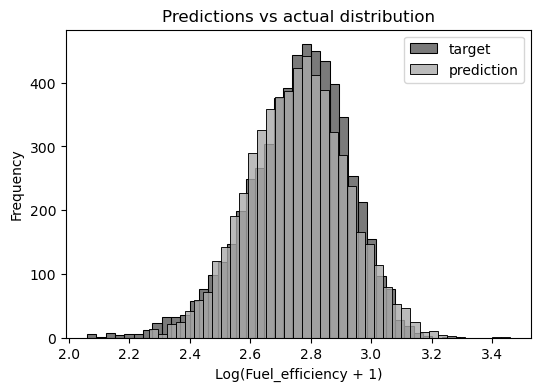

In [19]:
# Histogram plot of target and predictions for Option 2

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Fuel_efficiency + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [20]:
# Check RMSE score for option 1
rmse(y_train, y_pred_0)

0.0390863253926525

In [21]:
# Check RMSE score for option 2
rmse(y_train, y_pred_mean)

0.03581083785900231

### Q4. Missing values

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

In [22]:
# Regularization

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [23]:
# Filling NAs with 0
X_train = prepare_X_0(df_train)
X_val = prepare_X_0(df_val)

In [24]:
# Trying different values for r

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w_0, round(score, 2))
    

0 3.6646662472088183 0.04
0.01 3.1688134470120293 0.04
0.1 1.428836998929817 0.04
1 0.22012861947654205 0.04
5 0.046248856565895766 0.04
10 0.023271722731387577 0.04
100 0.002341368985298224 0.04


### Q5. Max fuel efficiency

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

In [25]:
scores = []  # Define scores list outside the loop

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # Initialize target variables
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    
    # Remove target from features
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    # Prepare features and train model
    X_train = prepare_X_0(df_train)
    w_0, w = train_linear_regression(X_train, y_train) 

    # Make predictions
    X_val = prepare_X_0(df_val)
    y_pred = w_0 + X_val.dot(w) 
    
    # Calculate and store RMSE
    score = rmse(y_val, y_pred)
    scores.append(score)

    print("|-----Seed----|-------RMSE Score------|")
    print(f"\t {s} \t\t {score:.4f}")
    print()

|-----Seed----|-------RMSE Score------|
	 0 		 0.0380

|-----Seed----|-------RMSE Score------|
	 1 		 0.0393

|-----Seed----|-------RMSE Score------|
	 2 		 0.0394

|-----Seed----|-------RMSE Score------|
	 3 		 0.0387

|-----Seed----|-------RMSE Score------|
	 4 		 0.0373

|-----Seed----|-------RMSE Score------|
	 5 		 0.0394

|-----Seed----|-------RMSE Score------|
	 6 		 0.0389

|-----Seed----|-------RMSE Score------|
	 7 		 0.0384

|-----Seed----|-------RMSE Score------|
	 8 		 0.0402

|-----Seed----|-------RMSE Score------|
	 9 		 0.0386



In [26]:
scores

[0.038017755371704195,
 0.03927885333905149,
 0.03944653052519472,
 0.03872763703743218,
 0.037275358500887396,
 0.03938438833940563,
 0.03890763931419336,
 0.03837971626983621,
 0.040189869753593684,
 0.03860764644096914]

In [27]:
# Calculate standard deviation of the scores
print(round(np.std(scores), 3))

0.001


### Q6. Median value of horsepower



* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [29]:
np.random.seed(9)

n = len(df)
n_test = int(0.2 * n)  
n_train_val = n - n_test  

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Create combined train+validation dataset
df_train_val = df_shuffled.iloc[:n_train_val].copy()
df_test = df_shuffled.iloc[n_train_val:].copy()

# Initialize target variables
y_train_val = np.log1p(df_train_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

# Remove target from features
del df_train_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Prepare features and train model
X_train_val = prepare_X_0(df_train_val)
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)  

# Make predictions on test set
X_test = prepare_X_0(df_test)
y_pred = w_0 + X_test.dot(w)

# Calculate RMSE on test set
test_score = rmse(y_test, y_pred)
print(f'Test RMSE: {round(test_score, 4)}')

Test RMSE: 0.0392
